<a href="https://colab.research.google.com/github/atarisafari/CAP4630-AI/blob/master/hw2/hw2_problem3_Ethan_Finlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIFAR10 data set
Classification with dense layers

#Underfit Model
The model is far too simple and can't properly explain the training or test data. 

## Loading the CIFAR10 data set

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
import matplotlib.pyplot as plt
import numpy as np

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Build and Compile the Model

In [8]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam', #Adaptive Moment Estimation
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])
            

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 121us/sample - loss: 1.5385 - acc: 0.4419 - val_loss: 1.2924 - val_acc: 0.5325
Epoch 2/10
50000/50000 [==============================] - 6s 118us/sample - loss: 1.1713 - acc: 0.5828 - val_loss: 1.1014 - val_acc: 0.6078
Epoch 3/10
50000/50000 [==============================] - 6s 119us/sample - loss: 1.0191 - acc: 0.6383 - val_loss: 0.9969 - val_acc: 0.6470
Epoch 4/10
50000/50000 [==============================] - 6s 118us/sample - loss: 0.9218 - acc: 0.6761 - val_loss: 0.9305 - val_acc: 0.6722
Epoch 5/10
50000/50000 [==============================] - 6s 117us/sample - loss: 0.8462 - acc: 0.7040 - val_loss: 0.9708 - val_acc: 0.6640
Epoch 6/10
50000/50000 [==============================] - 6s 118us/sample - loss: 0.7856 - acc: 0.7242 - val_loss: 0.8866 - val_acc: 0.6926
Epoch 7/10
50000/50000 [==============================] - 6s 117us/sample - loss: 0.7369 - acc: 0.7415 - val_l

### Evaluate accuracy

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.9062 - acc: 0.7139
Test accuracy: 0.7139


##Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

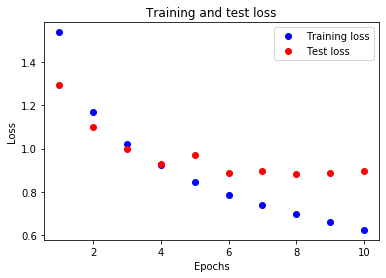

In [13]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

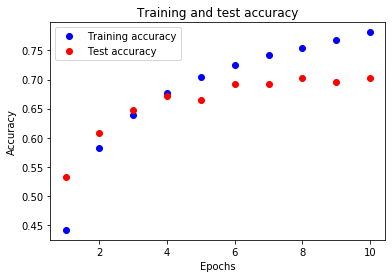

In [15]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Overfit Model
A model that overfits is essentially "memorizing" the training data rather than finding a general set of rules, as we'd expect. This can be due to overexposure to the training data (too many epochs) and/or an overcomplicated model. 

An overfit model will not be able to explain any test data that it wasnt explicitly trained on since all it did was memorize.

## Loading the CIFAR10 data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Build and Compile Model

In [19]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='sigmoid'),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='sigmoid'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam', #Adaptive Moment Estimation
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])
            

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.7970 - acc: 0.3293 - val_loss: 1.4564 - val_acc: 0.4674
Epoch 2/20
50000/50000 [==============================] - 6s 127us/sample - loss: 1.3653 - acc: 0.5089 - val_loss: 1.2529 - val_acc: 0.5555
Epoch 3/20
50000/50000 [==============================] - 6s 127us/sample - loss: 1.1537 - acc: 0.5930 - val_loss: 1.1062 - val_acc: 0.6121
Epoch 4/20
50000/50000 [==============================] - 6s 127us/sample - loss: 1.0050 - acc: 0.6483 - val_loss: 1.0024 - val_acc: 0.6481
Epoch 5/20
50000/50000 [==============================] - 6s 127us/sample - loss: 0.8942 - acc: 0.6895 - val_loss: 0.9547 - val_acc: 0.6694
Epoch 6/20
50000/50000 [==============================] - 6s 127us/sample - loss: 0.7987 - acc: 0.7208 - val_loss: 0.8920 - val_acc: 0.6929
Epoch 7/20
50000/50000 [==============================] - 6s 127us/sample - loss: 0.7082 - acc: 0.7539 - val_l

### Evaluate accuracy

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/sample - loss: 1.6149 - acc: 0.6882
Test accuracy: 0.6882


##Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

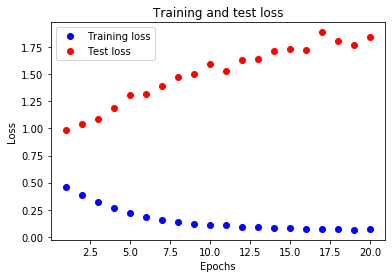

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

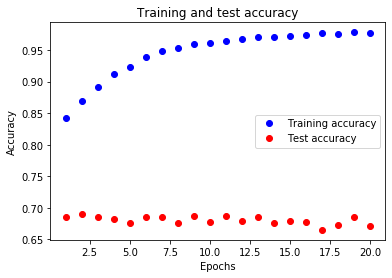

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#"Pretty Good" Model
This model is 'just right'. Essentially, we didn't overcomplicate it or make it too simple, we didn't train for too many epochs, and we used dropout to the fight overfitting. 

## Loading the CIFAR10 data set

In [21]:
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

cifar10 = keras.datasets.cifar10

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Using TensorFlow backend.


## Preprocess the data

In [0]:
train_images = train_images_original.astype('float32')
test_images = test_images_original.astype('float32')

### Calculating Z-Score

In [0]:
# z-score
mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images,axis=(0,1,2,3))
train_images = (train_images-mean)/(std+1e-7)
test_images = (test_images-mean)/(std+1e-7)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

###To Categorical

In [0]:
num_classes = len(class_names)
train_labels = np_utils.to_categorical(train_labels_original,num_classes)
test_labels = np_utils.to_categorical(test_labels_original,num_classes)

##Build and Compile Model

In [26]:
# set up the layers

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=train_images.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))# 40% chance of using any given neuron
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))#Output layer using softmax













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Utilizing Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_images)

In [28]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

# Compile the model
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(optimizer=opt_rms,
              loss='categorical_crossentropy', #categorical_crossentropy for One Hot Encoding
              metrics=['accuracy'])

In [0]:
epochs = 125

history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),
                              steps_per_epoch=train_images.shape[0] // batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(test_images,test_labels),
                              callbacks=[LearningRateScheduler(lr_schedule)])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/125
781/781 [==============================] - 23s 29ms/step - loss: 1.9359 - acc: 0.4124 - val_loss: 6.5149 - val_acc: 0.1493
Epoch 2/125
781/781 [==============================] - 22s 28ms/step - loss: 1.3209 - acc: 0.5773 - val_loss: 6.2430 - val_acc: 0.1235
Epoch 3/125
781/781 [==============================] - 22s 28ms/step - loss: 1.1285 - acc: 0.6413 - val_loss: 2.6693 - val_acc: 0.2596
Epoch 4/125
781/781 [==============================] - 21s 27ms/step - loss: 1.0175 - acc: 0.6789 - val_loss: 3.4739 - val_acc: 0.2392
Epoch 5/125
781/781 [==============================] - 21s 27ms/step - loss: 0.9473 - acc: 0.7030 - val_loss: 1.6330 - val_acc: 0.5366
Epoch 6/125
781/781 [==============================] - 21s 27ms/step - loss: 0.8921 - acc: 0.7223 - val_loss: 3.9481 - val_acc: 0.1514
Epoch 7/125
781/781 [==============================] - 21s 27ms/step - loss: 0.8612 - acc: 0.7

### Save Model

In [0]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 

### Load Model

In [0]:
# Grab our trained CNN
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 93us/step
Test accuracy: 0.8416


##Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

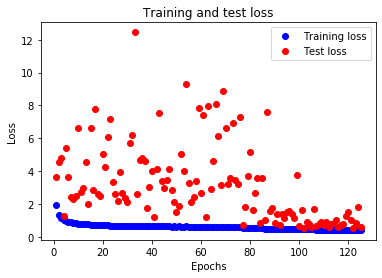

In [0]:
import matplotlib.pyplot as plt

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

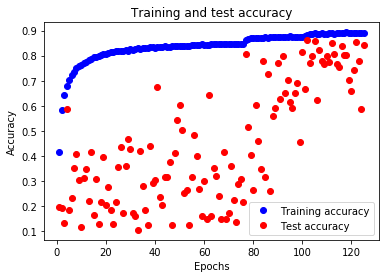

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()